In [1]:
import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

import pandas as pd

### Big Idea
We want to reduce the variability between words.  
Both "math" and "Math" mean the same thing, so we lowercase things to reduce the variability of the same exact term.  
Erdős, Erdös, and Erdos refer to the same person. Again, we're looking to reduce variability before we start searching for relationships between values.  


### Workflow:

We will establish a workflow to process our text data and prepare it for further use in exploration and modeling. This preprocessing is know as text **normalization**. Normalization is when you perform a series of tasks like making all text lowercase, removing punctuation, expanding contractions, removing anything that's not an ASCII character, etc.



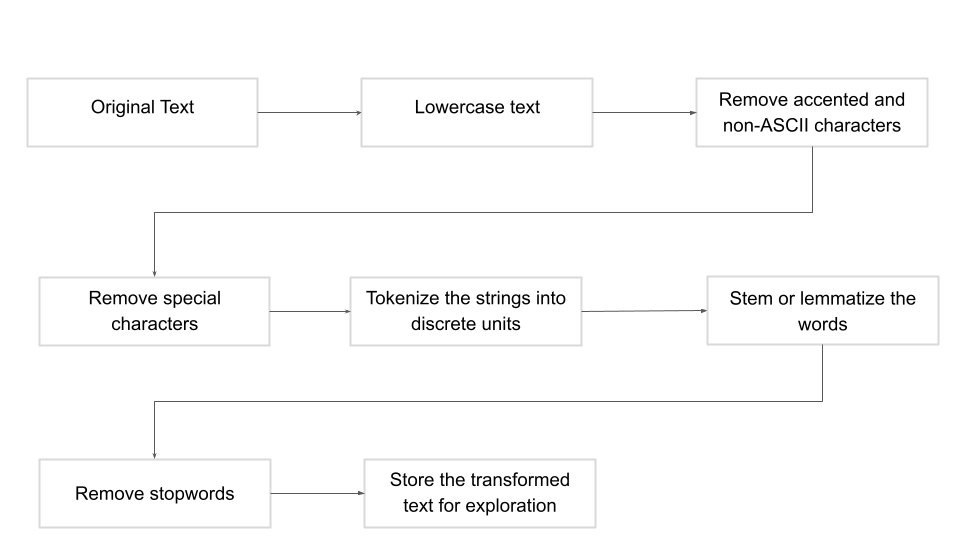

In [2]:
original = "Paul Erdős and George Pólya were influential Hungarian mathematicians who contributed \
a lot to the field. Erdős's name contains the Hungarian letter 'ő' ('o' with double acute accent), \
but is often incorrectly written as Erdos or Erdös either by mistake or out of typographical necessity"
original

"Paul Erdős and George Pólya were influential Hungarian mathematicians who contributed a lot to the field. Erdős's name contains the Hungarian letter 'ő' ('o' with double acute accent), but is often incorrectly written as Erdos or Erdös either by mistake or out of typographical necessity"

#### Lowercase the text

In [3]:
#lowercase all letters in the text

article = original.lower()

article


"paul erdős and george pólya were influential hungarian mathematicians who contributed a lot to the field. erdős's name contains the hungarian letter 'ő' ('o' with double acute accent), but is often incorrectly written as erdos or erdös either by mistake or out of typographical necessity"

#### Removing accented characters

In [4]:
# Normalizaton: Remove inconsistencies in unicode charater encoding.
# encode the strings into ASCII byte-strings (ignore non-ASCII characters)
# decode the byte-string back into a string

article = unicodedata.normalize('NFKD', article).encode('ascii', 'ignore').decode('utf-8')

article

"paul erdos and george polya were influential hungarian mathematicians who contributed a lot to the field. erdos's name contains the hungarian letter 'o' ('o' with double acute accent), but is often incorrectly written as erdos or erdos either by mistake or out of typographical necessity"

#### Removing Special Characters

In [5]:
# remove anything that is not a through z, a number, a single quote, or whitespace

article = re.sub(r"[^a-z0-9'\s]", '', article)
article

"paul erdos and george polya were influential hungarian mathematicians who contributed a lot to the field erdos's name contains the hungarian letter 'o' 'o' with double acute accent but is often incorrectly written as erdos or erdos either by mistake or out of typographical necessity"

#### Tokenization - break words and punctuation into discrete units
Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens

In [6]:
# Create the tokenizer
tokenizer = nltk.tokenize.ToktokTokenizer()

# Use the tokenizer
article = tokenizer.tokenize(article, return_str = True)

article

"paul erdos and george polya were influential hungarian mathematicians who contributed a lot to the field erdos ' s name contains the hungarian letter ' o ' ' o ' with double acute accent but is often incorrectly written as erdos or erdos either by mistake or out of typographical necessity"

In [10]:
from nltk import sent_tokenize

sent_tokenize(original)

['Paul Erdős and George Pólya were influential Hungarian mathematicians who contributed a lot to the field.',
 "Erdős's name contains the Hungarian letter 'ő' ('o' with double acute accent), but is often incorrectly written as Erdos or Erdös either by mistake or out of typographical necessity"]

### Stemming and Lemmatization - choose one


1. #### Stemming: reduce related words in your text to their common stem
    - "calls", "called", and "calling" all share the base stem "call". It can make it easier when you are searching for a particular word in your text to search for their common stem rather than every form of the word.  
    - suffix stripping
    - Algorithmic rules (non lingustic)
    - Fast and efficient

2. #### Lemmetize: 
    - Similar to stemming, but the root word is lexicographically correct word (present in the dictionary)  
    - Slower than stemming

#### Stemming

In [11]:
# Create porter stemmer.

ps = nltk.porter.PorterStemmer()

In [12]:
# Check stemmer. It works.

ps.stem('calling')

'call'

In [13]:
# Apply the stemmer to each word in our string.

stems = [ps.stem(word) for word in article.split()]

stems[:10]

['paul',
 'erdo',
 'and',
 'georg',
 'polya',
 'were',
 'influenti',
 'hungarian',
 'mathematician',
 'who']

In [14]:
# Join our lists of words into a string again; assign to a variable to save changes

article_stemmed = ' '.join(stems)
article_stemmed

"paul erdo and georg polya were influenti hungarian mathematician who contribut a lot to the field erdo ' s name contain the hungarian letter ' o ' ' o ' with doubl acut accent but is often incorrectli written as erdo or erdo either by mistak or out of typograph necess"

#### Lemmatize

In [16]:
# Download the first time.
#nltk.download('wordnet')

In [17]:
# Create the Lemmatizer.

wnl = nltk.stem.WordNetLemmatizer()

In [18]:
# Check lemmatizer. It works.

wnl.lemmatize('cats')

'cat'

In [19]:
# Use the lemmatizer on each word in the list of words we created by using split.

lemmas = [wnl.lemmatize(word) for word in article.split()]

lemmas[:10]

['paul',
 'erdos',
 'and',
 'george',
 'polya',
 'were',
 'influential',
 'hungarian',
 'mathematician',
 'who']

In [20]:
# Join our list of words into a string again; assign to a variable to save changes.

article_lemmatized = ' '.join(lemmas)
article_lemmatized

"paul erdos and george polya were influential hungarian mathematician who contributed a lot to the field erdos ' s name contains the hungarian letter ' o ' ' o ' with double acute accent but is often incorrectly written a erdos or erdos either by mistake or out of typographical necessity"

#### Removing Stopwords

- Words which have little or no significance, especially when constructing meaningful features from text, are known as stop words (or stopwords)
- example: a, an, the, and like
- we will use a standard English language stopwords list from nltk

In [23]:
# standard English language stopwords list from nltk
#nltk.download('stopwords')
stopword_list = stopwords.words('english')

In [24]:
len(stopword_list)

179

In [25]:
stopword_list[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [26]:
# you can add or remove from stopword list 

stopword_list.append('o')
stopword_list.remove('not')
stopword_list.append("'")

In [27]:
# Split words in lemmatized article.

words = article_lemmatized.split()

In [28]:
# Create a list of words from my string with stopwords removed and assign to variable.

filtered_words = [word for word in words if word not in stopword_list]

filtered_words[:10]



['paul',
 'erdos',
 'george',
 'polya',
 'influential',
 'hungarian',
 'mathematician',
 'contributed',
 'lot',
 'field']

In [29]:
# Join words in the list back into strings; assign to a variable to keep changes.

article_without_stopwords = ' '.join(filtered_words)

article_without_stopwords

'paul erdos george polya influential hungarian mathematician contributed lot field erdos name contains hungarian letter double acute accent often incorrectly written erdos erdos either mistake typographical necessity'

#### Extra content

In [30]:
# example: similar looking strings with different representations in Unicode
string1 = 'chloe\u0301'
string2 = 'chlo\u00e9'

http://unicode.org/reports/tr15/#Canon_Compat_Equivalence